In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [3]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v2"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170429 9_28 Family Types Log.xlsx',
 '20170429 9_28 FamilyCategory Log.xlsx',
 '20170429 9_28 FamilySubCategory Log.xlsx',
 '20170429 9_28 Host Families Log.xlsx',
 '20170429 9_28 Nested Families Log.xlsx',
 '20170429 9_28 OmniClass Log.xlsx',
 '20170429 9_28 Parameters Log.xlsx',
 '20170429 9_28 ParameterValuesByTypes Log.xlsx',
 '20170429 9_28 Reference Planes Log.xlsx',
 '20170429 9_28 Units Log.xlsx',
 '20170501 6_28 Materials Log.xlsx',
 '~$20170429 9_28 ParameterValuesByTypes Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [4]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "NestedFamilies",
        "OmniClass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        "Materials"
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170429 9_28 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170429 9_28 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170429 9_28 Family Types Log.xlsx',
 'HostFamilies': '20170429 9_28 Host Families Log.xlsx',
 'Materials': '20170501 6_28 Materials Log.xlsx',
 'NestedFamilies': '20170429 9_28 Nested Families Log.xlsx',
 'OmniClass': '20170429 9_28 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170429 9_28 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170429 9_28 Parameters Log.xlsx',
 'ReferencePlanes': '20170429 9_28 Reference Planes Log.xlsx',
 'Units': '20170429 9_28 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [5]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# MATERIALS

**m_path** and **m** reads from the ParameterValuesByTypes excel file.

In [6]:
m_path = os.path.join(directory, file_dict["Materials"])
m = pd.read_excel(m_path)

m["FamilyFilePath"] = m.apply(remove_rfaName, axis=1)
m["FamilyFilePath"] = m.apply(stripCommonPath, axis=1)
m["FamilyName"] = m.apply(stripFileType, axis=1)

m.drop(["ID", "MaterialColour", "Shininess", "Smoothness", "Transparency"], axis=1, inplace=True)

m.head(100)

,FamilyFilePath,FamilyName,Name,CutPatternName,CutPatternColour,SurfacePatternName,SurfacePatternColour
0,Windows\Structural,Window_Square Opening_WIN,Default,n/a,n/a,n/a,n/a
1,Windows\Structural,Window_Square Opening_WIN,Default Roof,n/a,n/a,n/a,n/a
2,Windows\Structural,Window_Square Opening_WIN,Default Wall,n/a,n/a,n/a,n/a
3,Windows\Structural,Window_Square Opening_WIN,Glass,n/a,n/a,n/a,n/a
4,Windows\Structural,Window_Square Opening_WIN,Poche,n/a,n/a,n/a,n/a
5,Windows\Structural,Window_Square Opening_WIN,Default Light Source,n/a,n/a,n/a,n/a
6,Windows\Structural,Window_Round Opening_WIN,Default,n/a,n/a,n/a,n/a
7,Windows\Structural,Window_Round Opening_WIN,Default Roof,n/a,n/a,n/a,n/a
8,Windows\Structural,Window_Round Opening_WIN,Default Wall,n/a,n/a,n/a,n/a
9,Windows\Structural,Window_Round Opening_WIN,Glass,n/a,n/a,n/a,n/a


In [7]:
nameAndMat = m[["FamilyName", "Name"]]

nameAndMat.head()

,FamilyName,Name
0,Window_Square Opening_WIN,Default
1,Window_Square Opening_WIN,Default Roof
2,Window_Square Opening_WIN,Default Wall
3,Window_Square Opening_WIN,Glass
4,Window_Square Opening_WIN,Poche


In [8]:
mat_grouped = nameAndMat.groupby("FamilyName").agg(["count"])

mat_grouped

,Name
,count
FamilyName,
1 Bay Window,11
1 Bay Window - Non Hosted,19
10P_Perimeter_Bench_FYS,22
115_BVNDH_WC Cubicle,12
12P_Meeting_FYS,28
140 Block_DCO,12
14P_Meeting_Rectangle_FYS,26
16P_Meeting_Rectangle_ FYS,26


In [9]:
mat_counts = mat_grouped["Name"]
mat_counts[mat_counts["count"]>100]

,count
FamilyName,
Drainage_Roof Drain 100mm_DCO,278
Drainage_Roof Drain 150mm_DCO,278
Drainage_Roof Drain 200mm_DCO,278
Drainage_Roof Drain_DCO,278
Dulux_ Colour Family_Blues_GEN,1144
Dulux_ Colour Family_Bolds and Brights_GEN,144
Dulux_ Colour Family_Greens_GEN,968
Dulux_ Colour Family_New Zealand_GEN,120
Dulux_ Colour Family_Oranges_GEN,264


## No. of unique materials

In [10]:
print len(nameAndMat.Name.unique())

6944


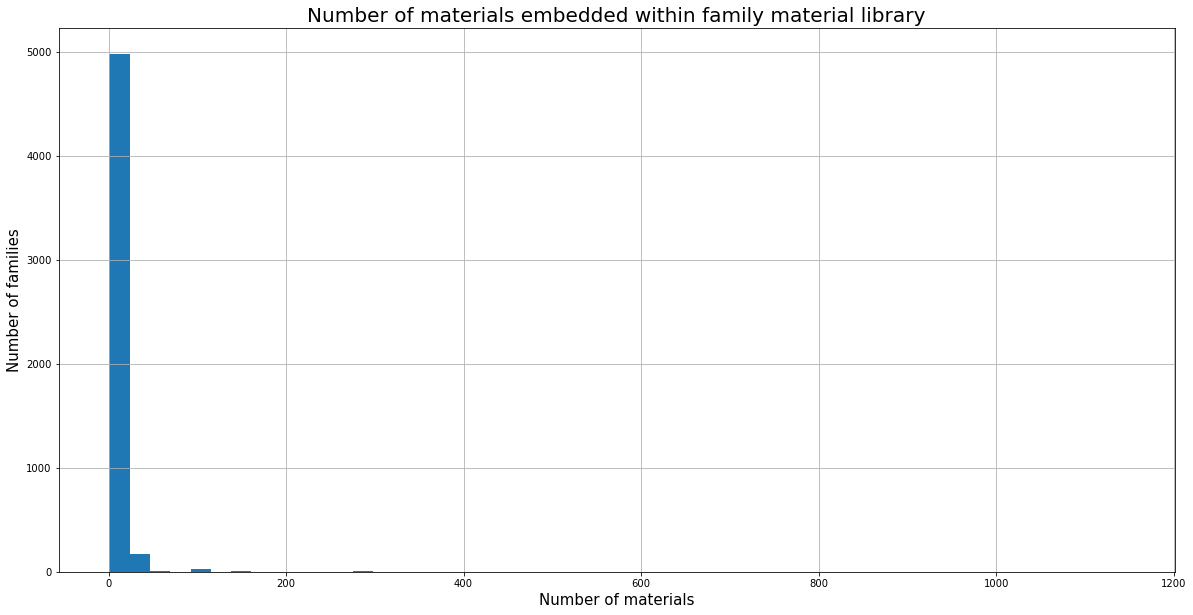

In [11]:
mat_grouped["Name"].hist(bins=50);
plt.title("Number of materials embedded within family material library", fontsize=20)
plt.xlabel("Number of materials", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()